<h3> Sergio Andres Rios Gomez</h3>
<h4> Modelo K- Nearest Neighbors (KNN)</h4>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
ruta_archivo = '../data/processed/df_process_data.csv'
df = pd.read_csv(ruta_archivo)

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


<h3> División de Datos en Entrenamiento y Prueba.</h3>

In [4]:
# Separar características (X) y variable objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3> Entrenamiento del Modelo KNN.</h3>

In [13]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

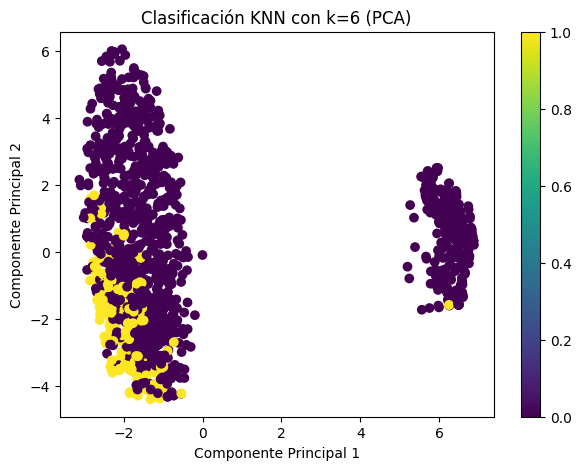

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

# Graficar los resultados
plt.figure(figsize=(7, 5))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('Clasificación KNN con k=6 (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

<li> La gráfica muestra que el modelo KNN con k=6 ha logrado clasificar los datos de manera efectiva en el espacio de 2 componentes principales.</li>
<li> Las clases tienden a agruparse en regiones distintas del plano cartesiano, lo que indica que el modelo ha aprendido a distinguir entre las clases.</li>
<li> PCA ha sido útil para reducir la dimensionalidad de los datos y permitir la visualización de los resultados en un plano cartesiano.</li>

<h4> Predicción y Evaluación de Precisión:</h4>

Precisión del modelo KNN: 0.7913


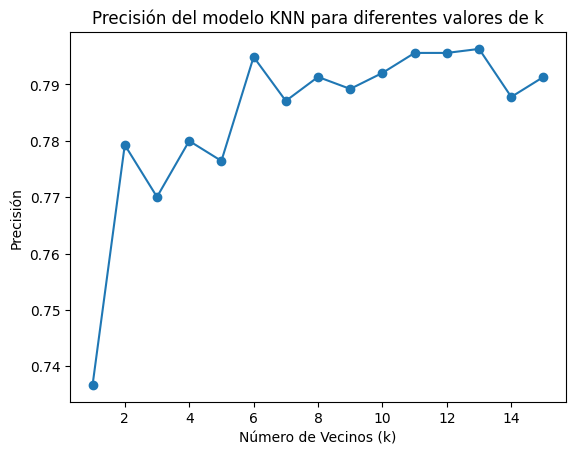

In [15]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy:.4f}")

k_values = range(1, 16)  # Ajustar el hiperparametro de K
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la precisión en función de k
plt.plot(k_values, accuracies, marker='o')
plt.title('Precisión del modelo KNN para diferentes valores de k')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.show()

<p> Bajo rendimiento con k pequeño: Cuando k es pequeño (1 o 2), la precisión del modelo es baja</p>
<p> A medida que k aumenta, la precisión del modelo mejora significativamente, alcanzando un pico alrededor de k=6 o k=7 </p>
<p>Para valores de k entre 7 y 15, la precisión del modelo se mantiene relativamente estable, con pequeñas fluctuaciones. Esto indica que el modelo es robusto a pequeños cambios en k en este rango. </p>
<p> El valor óptimo de k para este conjunto de datos parece estar alrededor de 6, ya que es donde el modelo alcanza su máxima precisión.</p>
<p> El modelo KNN muestra un rendimiento relativamente bueno en este conjunto de datos, con una precisión de alrededor del 79%</p>
<p> Es importante elegir un valor adecuado de k para evitar el sobreajuste o el subajuste del modelo.</p>



<h3> Guardar el modelo  KNN entrenado.</h3>

In [12]:
ruta_models = os.path.join(os.getcwd(), '..', 'models')

if not os.path.exists(ruta_models):
    os.makedirs(ruta_models)

ruta_archivo_modelo = os.path.join(ruta_models, 'mode_KNN_entrenado.joblib')
joblib.dump(y_pred, ruta_archivo_modelo)

print(f"Modelo guardado en para un uso posterior.")

Modelo guardado en para un uso posterior.
